In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from functools import partial
import pandas as pd
#https://isquared.digital/visualizations/2020-06-26-julia-set/ 

# ignore warnings
import warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl 
#https://holypython.com/how-to-save-matplotlib-animations-the-ultimate-guide/
mpl.rcParams['animation.ffmpeg_path'] = r'C:\ffmpeg\bin\\ffmpeg.exe'

In [2]:
def julia_quadratic(zx, zy, cx, cy, threshold):
    """Calculates whether the number z[0] = zx + i*zy with a constant c = x + i*y belongs
    to the Julia set. In order to belong, the sequence z[n + 1] = z[n]**2 + c, 
    must not diverge after 'threshold' number of steps. The sequence diverges
    if the absolute value of z[n+1] is greater than 4.
    
    :param float zx: the x component of z[0]
    :param float zy: the y component of z[0]
    :param float cx: the x component of the constant c
    :param float cy: the y component of the constant c
    :param int threshold: the number of iterations to considered it converged
    """
    # initial conditions
    z = complex(zx, zy)
    c = complex(cx, cy)
    
    for i in range(threshold):
        z = z**2 + c
        if abs(z) > 4.:  # it diverged
            return i
        
    return threshold - 1  # it didn't diverge

In [3]:
def generate_picture(a = 2 * np.pi / 4., r = 0.7885, density_per_unit = 400, threshold=20):
    x_start, y_start = -2, -2  # an interesting region starts here
    width, height = 4, 4  # for 3 units to the left and to the right
      # how many pixles per unit # I need 1000 to get 4K, 500 for 2K https://en.wikipedia.org/wiki/4K_resolution

    re = np.linspace(x_start, x_start + width, width * density_per_unit )  # real axis
    im = np.linspace(y_start, y_start + height, height * density_per_unit)  # imaginary axis

    X = np.empty((len(re), len(im)))  # the initial array-like image


    # we represent c as c = r*cos(a) + i*r*sin(a) = r*e^{i*a}
    
    cx, cy = r * np.cos(a), r * np.sin(a)

    # fill-in the image with the number of interations
    for i in range(len(re)):
        for j in range(len(im)):
            X[i, j] = julia_quadratic(zx=re[i], zy=im[j], cx=cx, cy=cy, threshold=threshold)

    #plt.savefig('julia_Set.png', dpi=300, bbox_inches='tight')
    return X

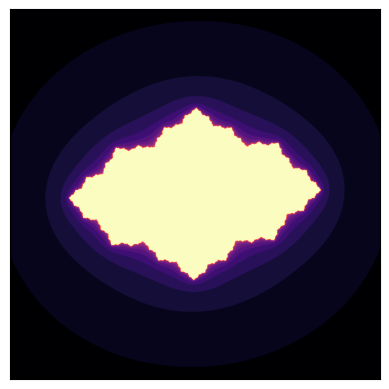

In [4]:
X = generate_picture(a = 3, r = 0.5)
ax = plt.axes()
ax.clear()
ax.set_xticks([], [])
ax.set_yticks([], [])
    # fill-in the image with the number of interations

img = ax.imshow(X.T, interpolation="hamming", cmap='magma')

In [5]:
#%matplotlib ipympl
#https://stackoverflow.com/questions/64613706/animate-update-a-matplotlib-plot-in-vs-code-notebook
#plt.rcParams["animation.html"] = "jshtml"

 # number of frames in the animation


# we represent c as c = r*cos(a) + i*r*sin(a) = r*e^{i*a}



def animate(i, a = 2*np.linspace(0,2*np.pi, 100), r = [0.7885]*100, cmap = "magma"):
    # clear axes object
    
    ax = plt.axes()
    ax.clear()
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    # fill-in the image with the number of interations
    X = generate_picture(a[i], r = r[i])
    
    img = ax.imshow(X.T, interpolation="hamming", cmap=cmap)
    plt.gcf().text(0.15, 0.08, 'by Javier Aguilar Martín', fontsize=18)
    return [img]
    # call the animator	 
    
def generate_animation(as_mp4 = True, file_name ='julia_set',  a = 2*np.linspace(0,2*np.pi, 100),r = [0.7885]*100, cmap = "magma"):
    frames = len(a)
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes()
    ax.clear()
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    anim = animation.FuncAnimation(fig, partial(animate, a = a, r = r, cmap = cmap), frames=frames, blit=True)
    if as_mp4:
            # Set up formatting for the movie files
            Writer = animation.writers['ffmpeg']
            writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
            # save the animation as a mp4 file 
            anim.save(file_name+'.mp4', writer=writer)   
    else:
            anim.save(file_name+'.gif', writer='imagemagick')  
    
    
#generate_animation()

In [6]:
file_numbers = ["03", "04", "08", "14", "16", "29", "30", "33", "36"]
cmaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'winter', 'cool', 'Wistia',
            'hot']
#signals = {}
for i, file_number in enumerate(file_numbers[1:]):
    directory = "Data\\Data\\"+file_number+".csv"
    df = pd.read_csv(directory, on_bad_lines="skip")
    data = df["DATA"].head(300).to_numpy()
    distribution = (data - np.min(data))/(np.max(data)-np.min(data))
    r = distribution+0.5
    a = 2*np.pi*distribution
    cmap = cmaps[i]
    generate_animation(file_name = file_number, a = a, r = r, cmap = cmap)

                     


In [ ]:
data_03 = pd.read_csv("Data\\Data\\03.csv", on_bad_lines="skip")
data_03["DATA"].shape[0]/26
#a = data_03["DATA"].sample(1000, replace=False).sort_index().to_list()
a = data_03["DATA"].head(50).to_numpy()
r = (a - np.min(a))/(np.max(a)-np.min(a))+0.5
a = 2*np.pi * (r-0.5)
generate_animation(a = a)

: 